<a href="https://colab.research.google.com/github/9mithun9/Sonar-Mine-vs-Rock-Model/blob/main/Sonar_Mine_vs_Rock_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Downloading Data**


*   Downloading data:https://archive.ics.uci.edu/dataset/151/connectionist+bench+sonar+mines+vs+rocks
*   Installing dependecnies also



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/Data/sonar_dataset.csv'

In [6]:
import pandas as pd
df = pd.read_csv(file_path, header=None)

**Exploration of Data**


*   Target column (df[60]) was mapped to binary values



In [7]:
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
40,0.0068,0.0232,0.0513,0.0444,0.0249,0.0637,0.0422,0.1130,0.1911,0.2475,...,0.0173,0.0163,0.0055,0.0045,0.0068,0.0041,0.0052,0.0194,0.0105,R
72,0.0208,0.0186,0.0131,0.0211,0.0610,0.0613,0.0612,0.0506,0.0989,0.1093,...,0.0074,0.0063,0.0081,0.0087,0.0044,0.0028,0.0019,0.0049,0.0023,R
27,0.0177,0.0300,0.0288,0.0394,0.0630,0.0526,0.0688,0.0633,0.0624,0.0613,...,0.0102,0.0122,0.0044,0.0075,0.0124,0.0099,0.0057,0.0032,0.0019,R
54,0.0132,0.0080,0.0188,0.0141,0.0436,0.0668,0.0609,0.0131,0.0899,0.0922,...,0.0044,0.0028,0.0021,0.0022,0.0048,0.0138,0.0140,0.0028,0.0064,R
155,0.0211,0.0128,0.0015,0.0450,0.0711,0.1563,0.1518,0.1206,0.1666,0.1345,...,0.0117,0.0023,0.0047,0.0049,0.0031,0.0024,0.0039,0.0051,0.0015,M


In [8]:
df.shape

(208, 61)

In [9]:
df.isna().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
56,0
57,0
58,0
59,0


In [10]:
df[60].value_counts()

,count
60,
M,111
R,97


In [16]:
df[60] = df[60].map({'R':0, 'M':1})

In [17]:
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
127,0.0209,0.0261,0.0120,0.0768,0.1064,0.1680,0.3016,0.3460,0.3314,0.4125,...,0.0057,0.0159,0.0085,0.0372,0.0101,0.0127,0.0288,0.0129,0.0023,1
71,0.0036,0.0078,0.0092,0.0387,0.0530,0.1197,0.1243,0.1026,0.1239,0.0888,...,0.0119,0.0055,0.0035,0.0036,0.0004,0.0018,0.0049,0.0024,0.0016,0
120,0.0346,0.0509,0.0079,0.0243,0.0432,0.0735,0.0938,0.1134,0.1228,0.1508,...,0.0040,0.0122,0.0107,0.0112,0.0102,0.0052,0.0024,0.0079,0.0031,1
197,0.0366,0.0421,0.0504,0.0250,0.0596,0.0252,0.0958,0.0991,0.1419,0.1847,...,0.0132,0.0027,0.0022,0.0059,0.0016,0.0025,0.0017,0.0027,0.0027,1
152,0.0131,0.0201,0.0045,0.0217,0.0230,0.0481,0.0742,0.0333,0.1369,0.2079,...,0.0168,0.0086,0.0045,0.0062,0.0065,0.0030,0.0066,0.0029,0.0053,1


**Train-Test Split**


*   Spliting the available data to 75:25



In [21]:
from sklearn.model_selection import train_test_split

x = df.drop(60, axis = 1)
y = df[60]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [22]:
x_test.shape

(52, 60)

**Creating Model**


*   2 hidden layers with 'relu' as activation function
*   50% dropout is applied for avoiding overfitting



In [23]:
import tensorflow as tf
from tensorflow import keras

In [39]:
model = keras.Sequential([
    keras.layers.Dense(60, input_dim=60, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
    ])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100, batch_size=8)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4792 - loss: 0.7861
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4404 - loss: 0.7586
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5292 - loss: 0.7123
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5779 - loss: 0.6664
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5286 - loss: 0.7046
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5365 - loss: 0.6861
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5844 - loss: 0.6833
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5261 - loss: 0.6958
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5629 - loss: 0.7057 
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6739 - loss: 0.6733
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6681 - loss: 0.6500 
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6951 - 

In [40]:
model.evaluate(x_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8942 - loss: 0.2684 


[0.26841118931770325, 0.9038461446762085]

In [29]:
import numpy as np

In [41]:
y_pred = np.round(model.predict(x_test).reshape(-1))
print(y_pred[:10])

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
[1. 0. 0. 0. 1. 0. 1. 1. 0. 1.]


In [28]:
y_test[:10]

,60
161,1
15,0
73,0
96,0
166,1
9,0
100,1
135,1
18,0
148,1


**Evaluation**


*   Classification Report to view Accuracy, Precision & Recall
*   Confusion Matrix is created to visualize better



In [42]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        22
           1       0.90      0.93      0.92        30

    accuracy                           0.90        52
   macro avg       0.90      0.90      0.90        52
weighted avg       0.90      0.90      0.90        52



Text(95.72222222222221, 0.5, 'Truth')

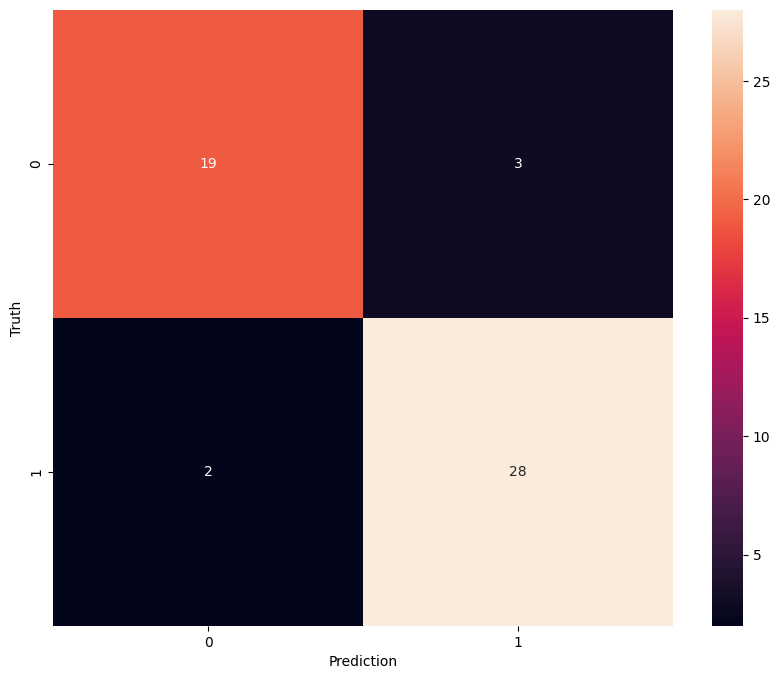

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')